In [31]:
#shap
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("../data/data_scaled.csv")

In [33]:
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
params = {'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8}
model = XGBClassifier(**params)

In [35]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [45]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :], show=True)

In [38]:
X_train.iloc[0,:]

koi_period         -0.410542
koi_time0bk         0.135659
koi_time0           0.135661
koi_impact         -0.235307
koi_duration       -0.491366
koi_depth          -0.313297
koi_ror            -0.085705
koi_srho           -0.060723
koi_prad           -0.031799
koi_sma            -0.453529
koi_incl            0.526866
koi_teq            -0.451469
koi_insol          -0.051568
koi_dor            -0.241515
koi_ldm_coeff2     -1.271643
koi_ldm_coeff1      1.261944
koi_max_sngle_ev   -0.229741
koi_max_mult_ev    -0.246694
koi_model_snr      -0.271861
koi_count           3.983643
koi_num_transits   -0.303671
koi_tce_plnt_num    1.263091
koi_quarters        0.468648
koi_bin_oedp_sig    0.363850
koi_steff          -0.983292
koi_slogg           0.784887
koi_smet           -0.842580
koi_srad           -0.172501
koi_smass          -0.847910
ra                 -1.871746
dec                 0.451734
koi_kepmag         -0.375984
koi_gmag           -0.265977
koi_rmag           -0.397327
koi_imag      

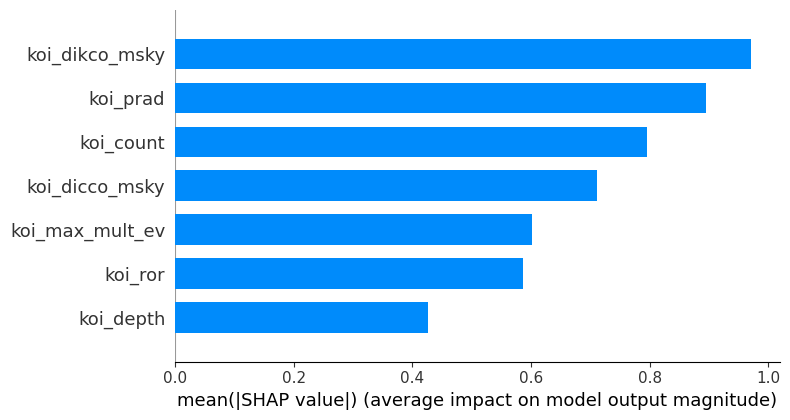

In [39]:
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=7)

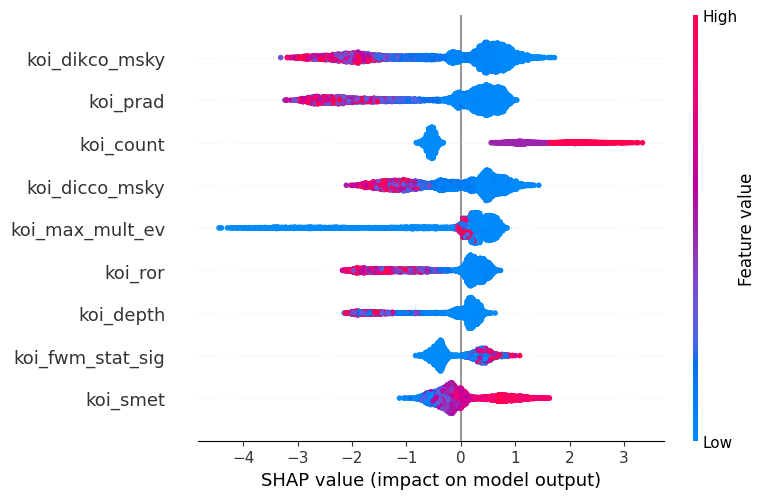

In [40]:
shap.summary_plot(shap_values, X_train, max_display=9)

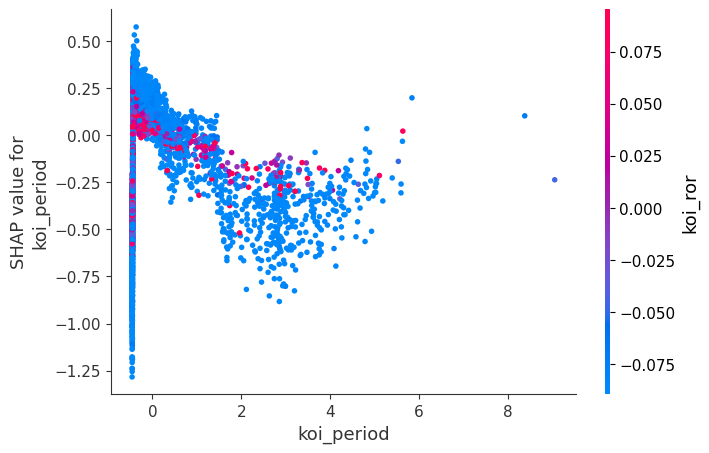

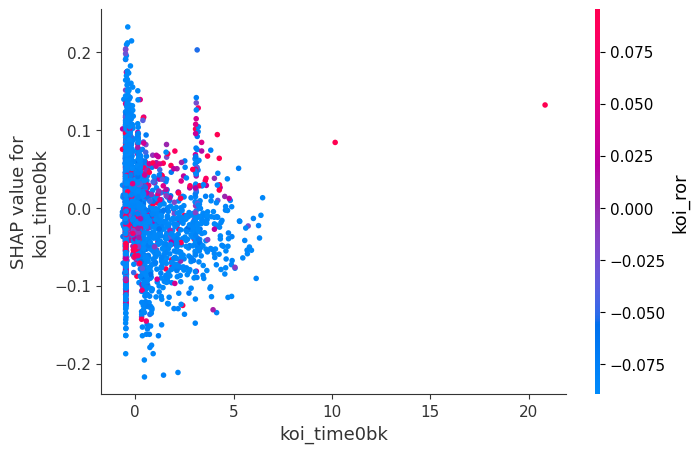

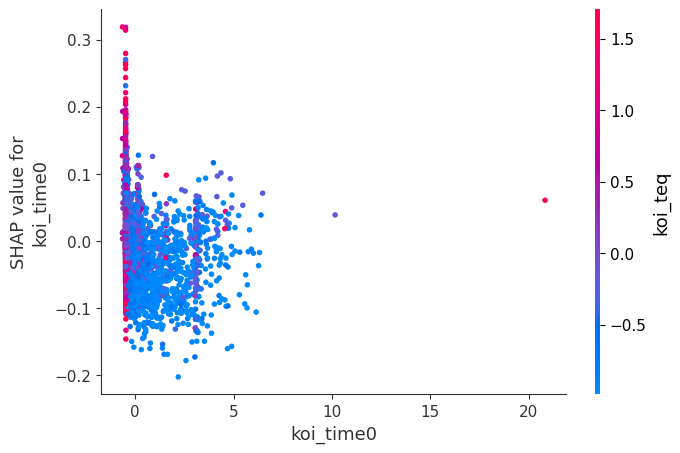

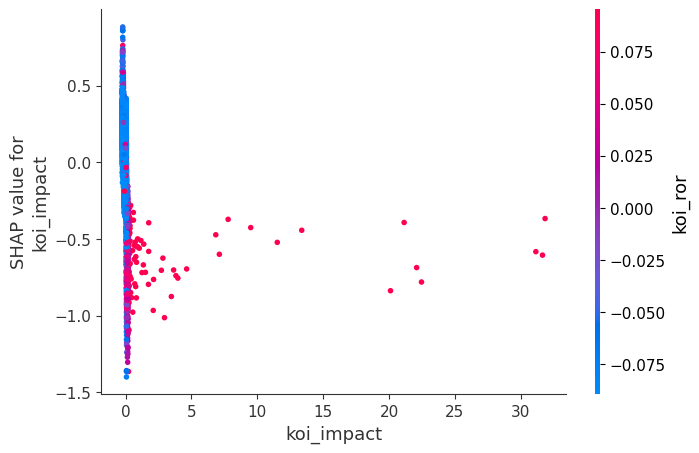

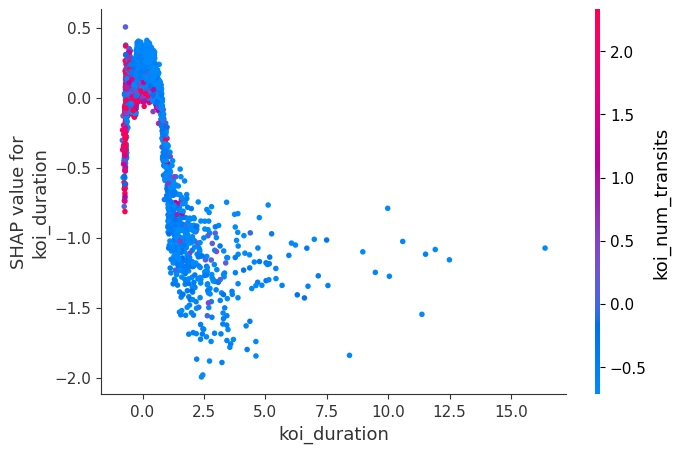

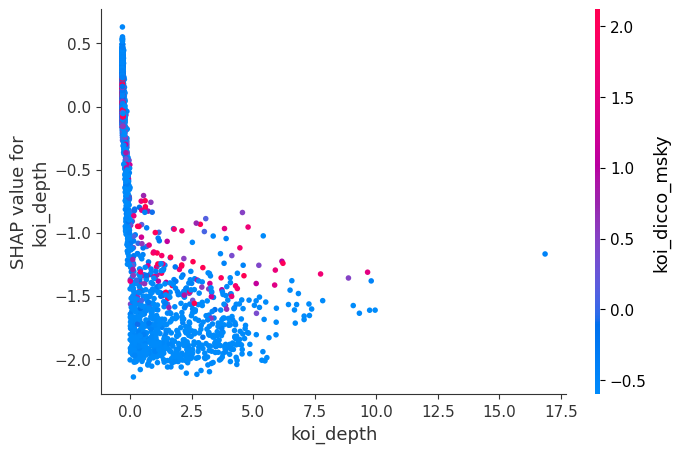

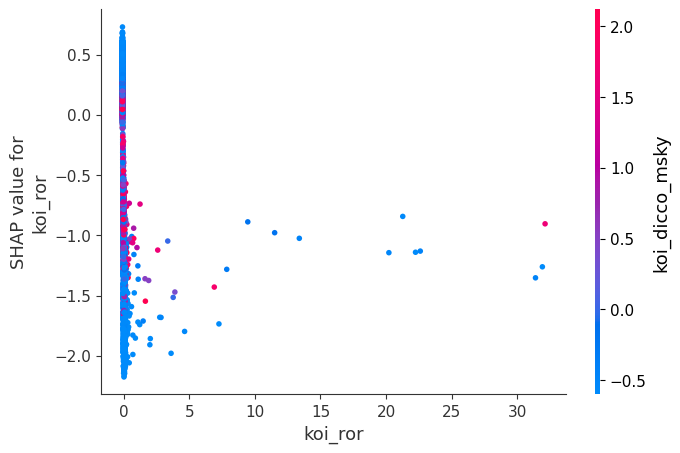

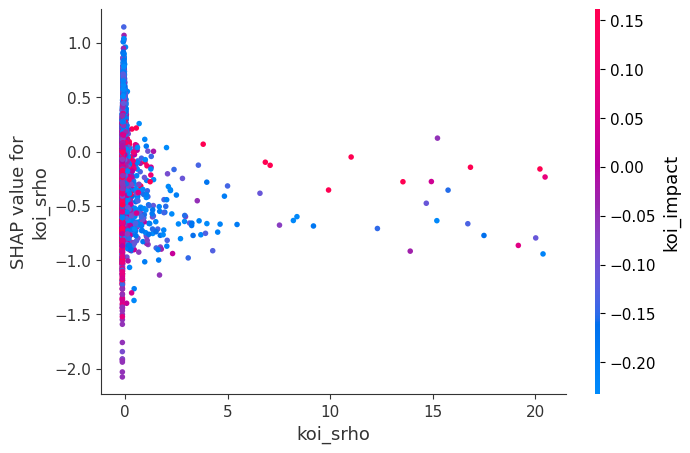

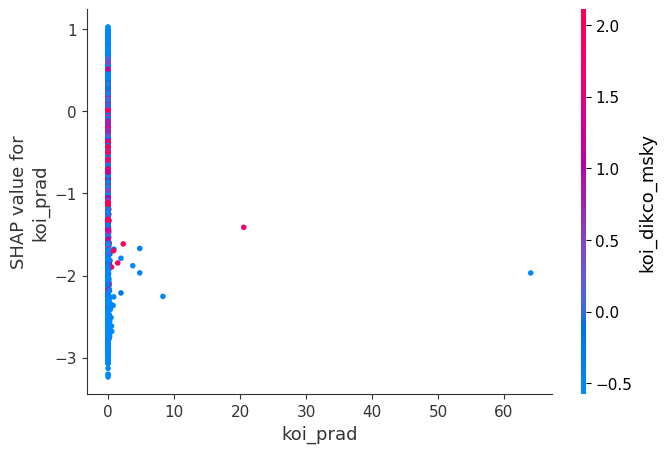

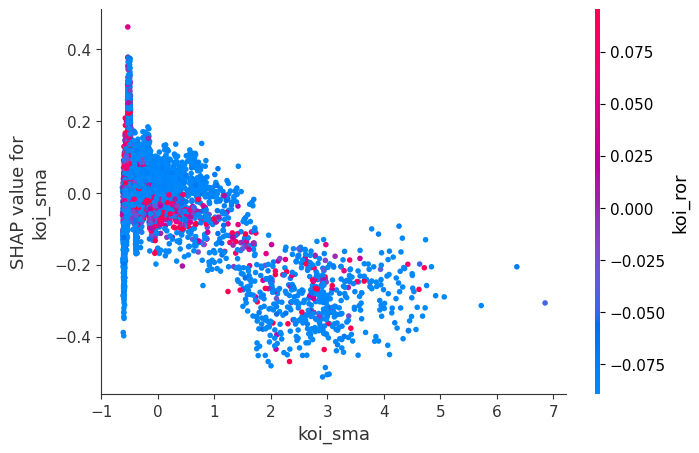

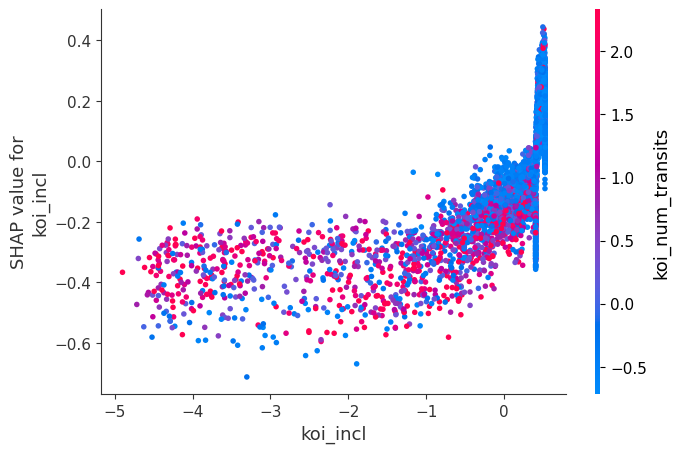

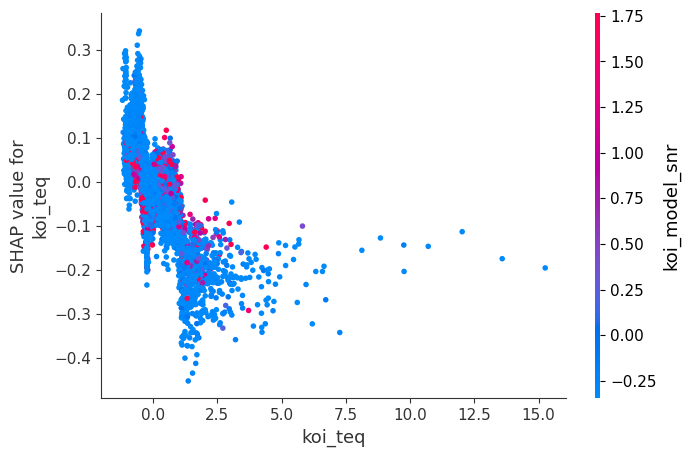

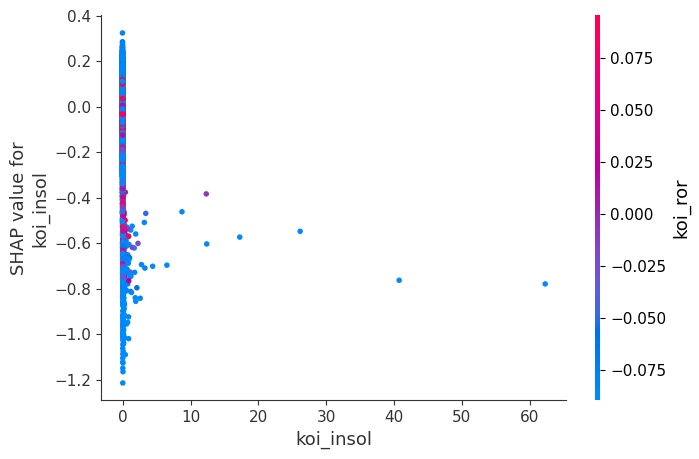

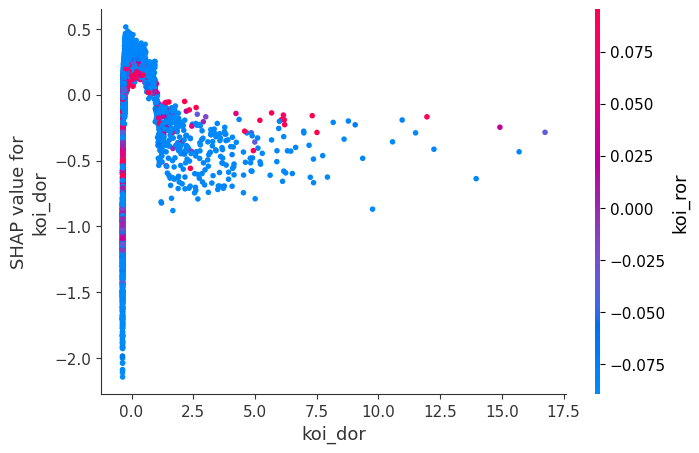

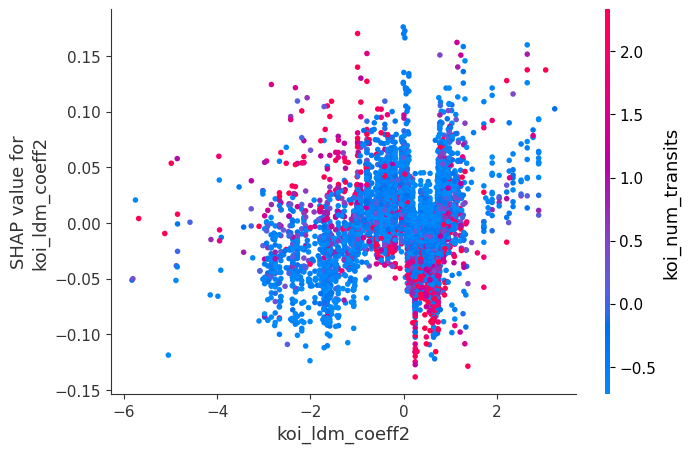

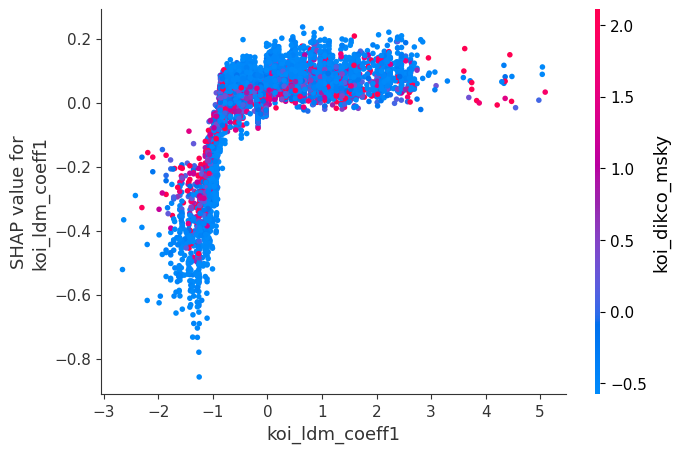

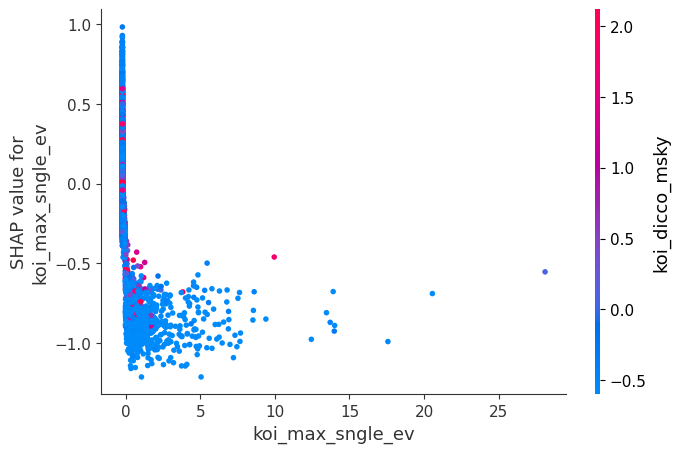

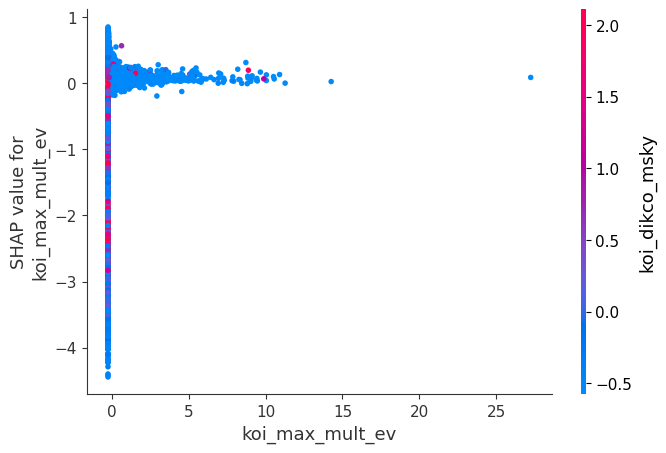

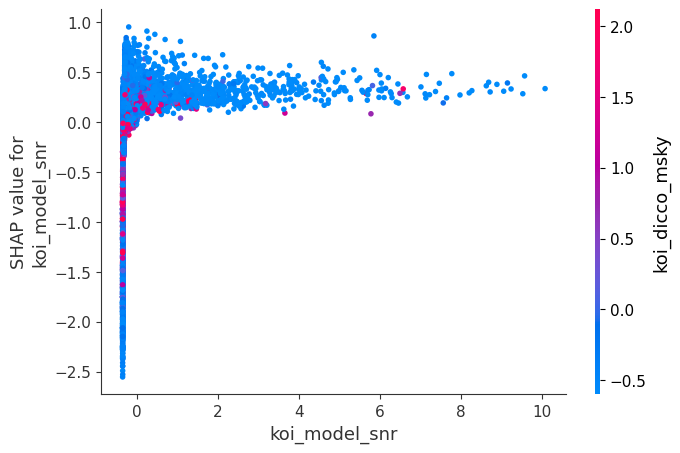

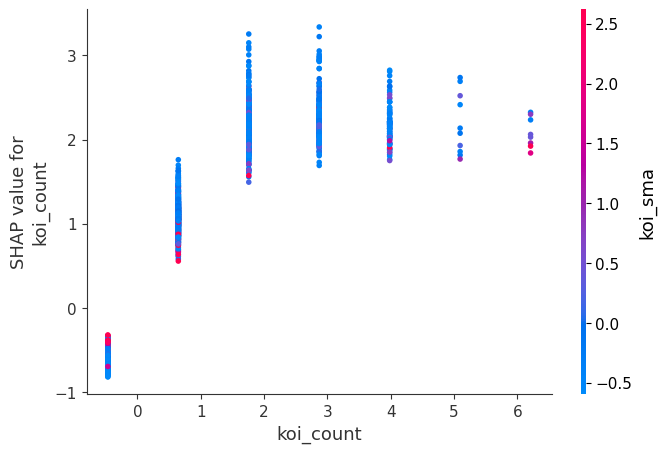

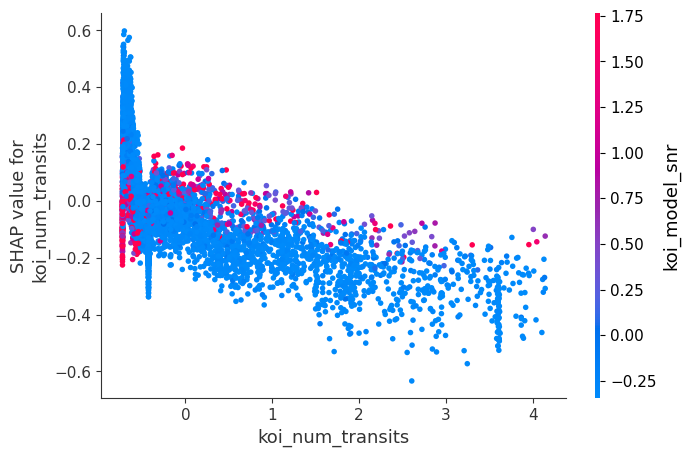

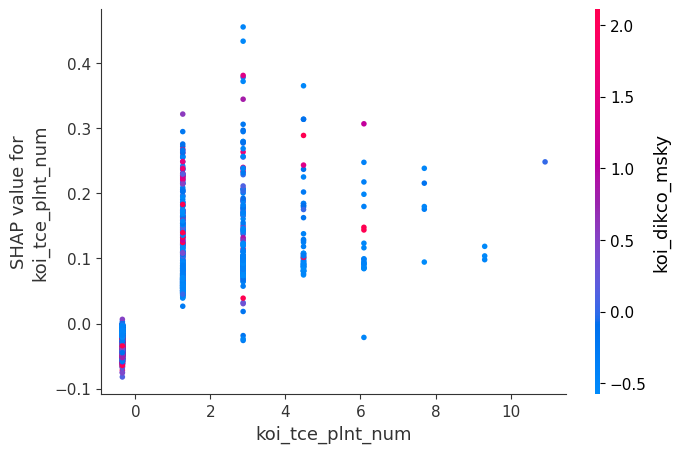

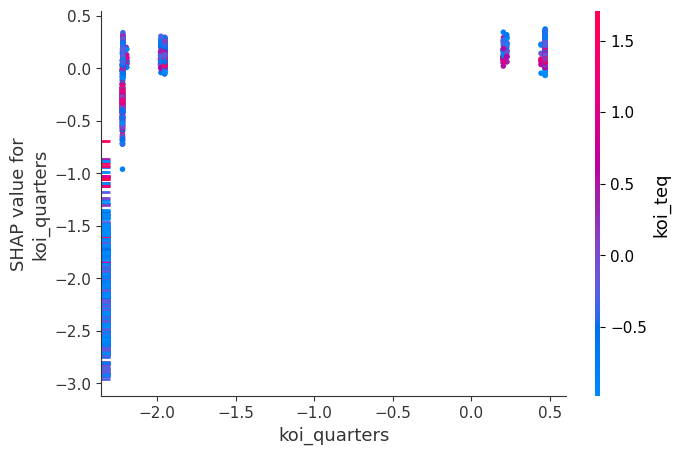

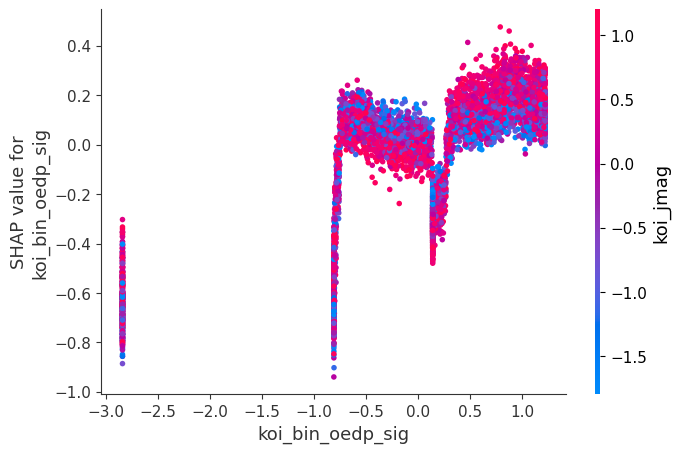

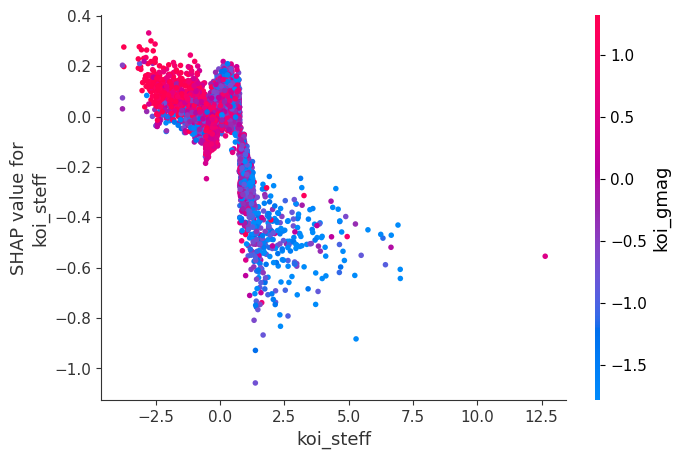

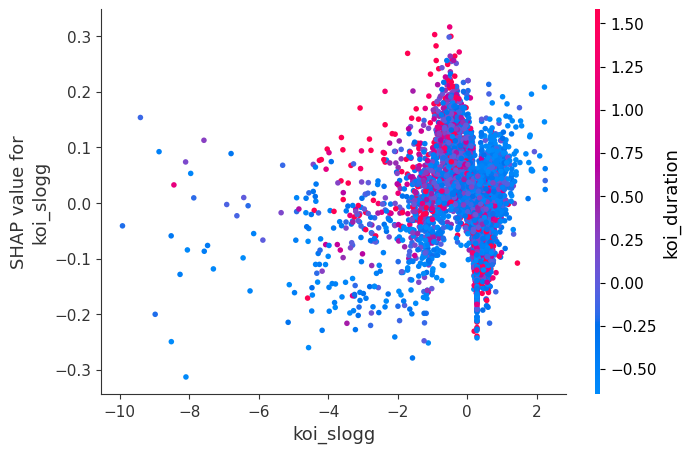

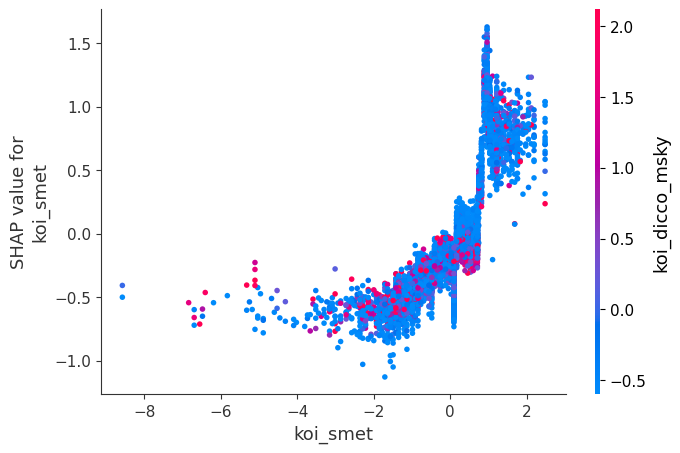

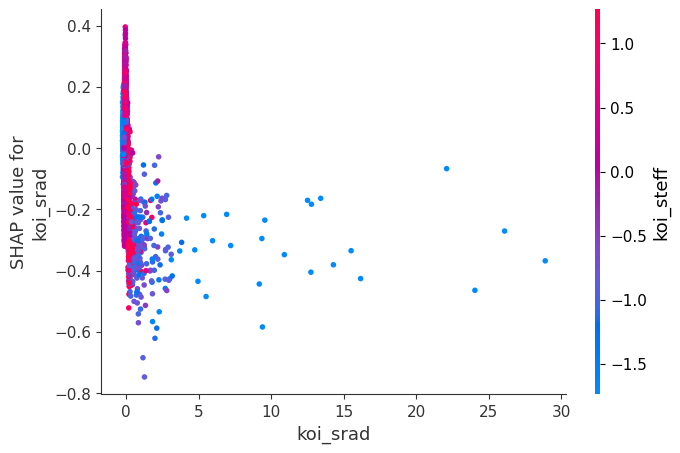

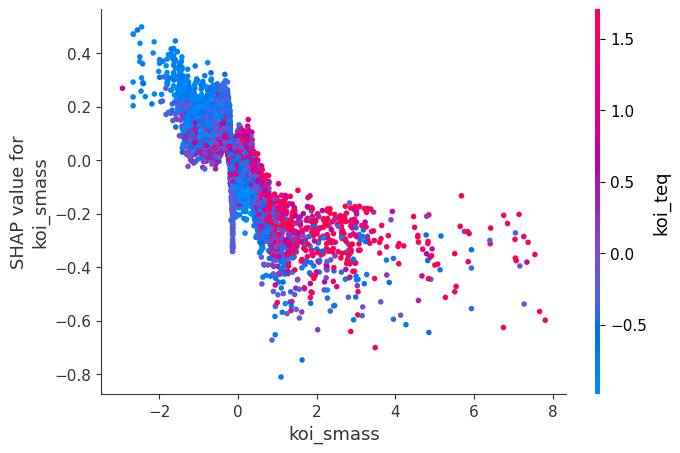

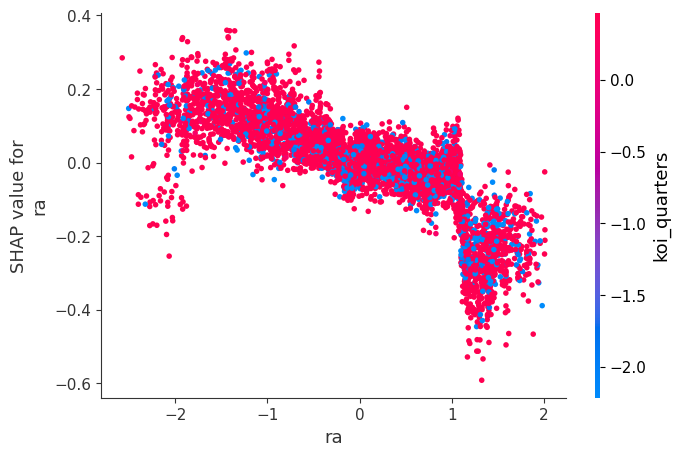

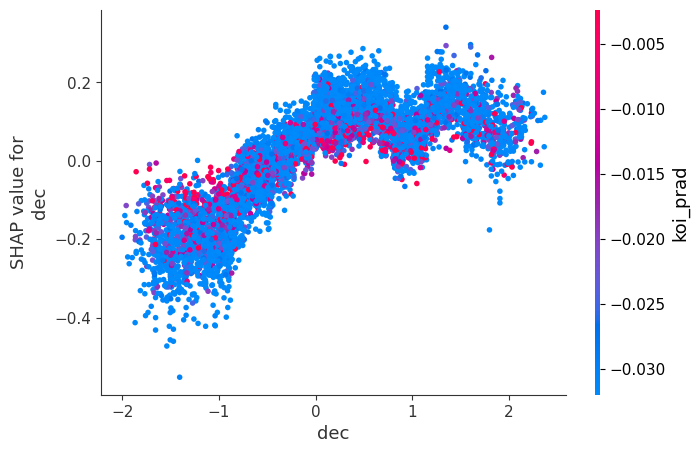

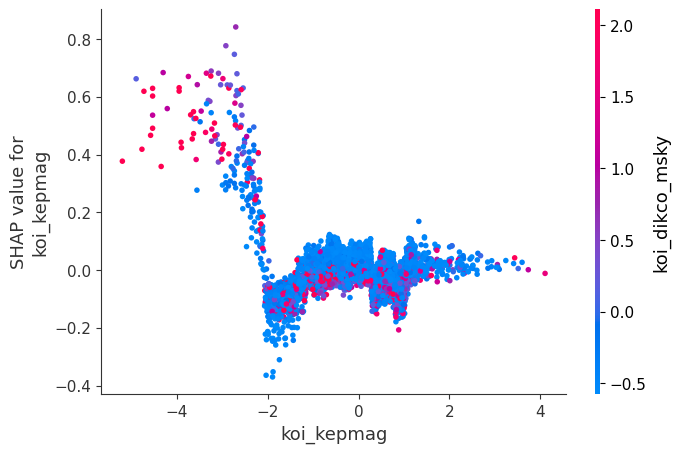

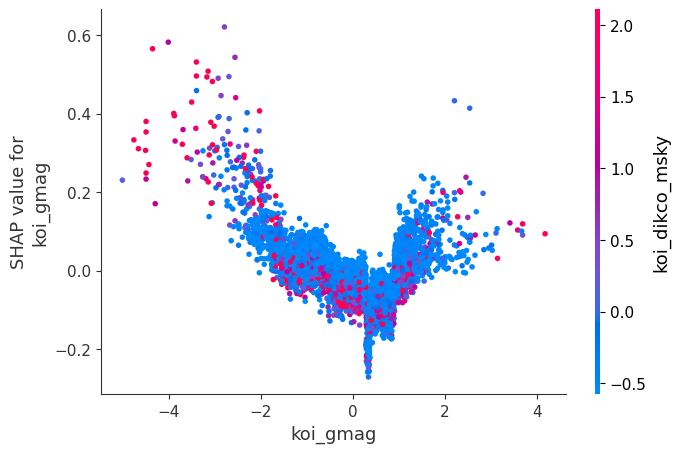

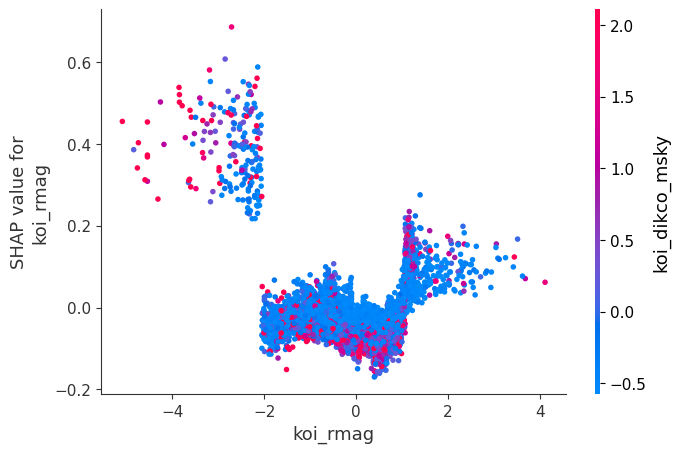

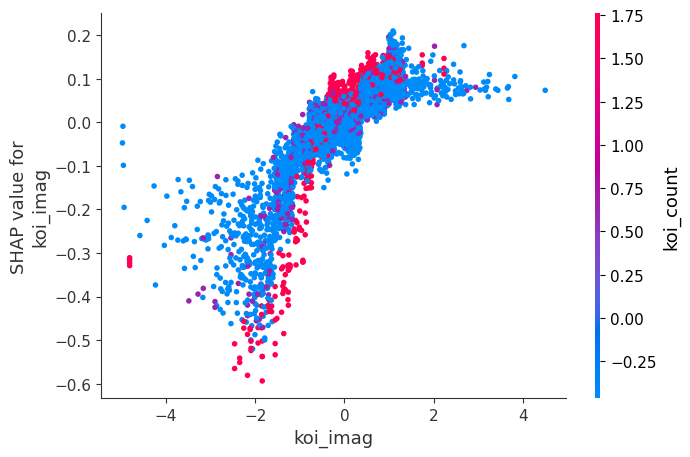

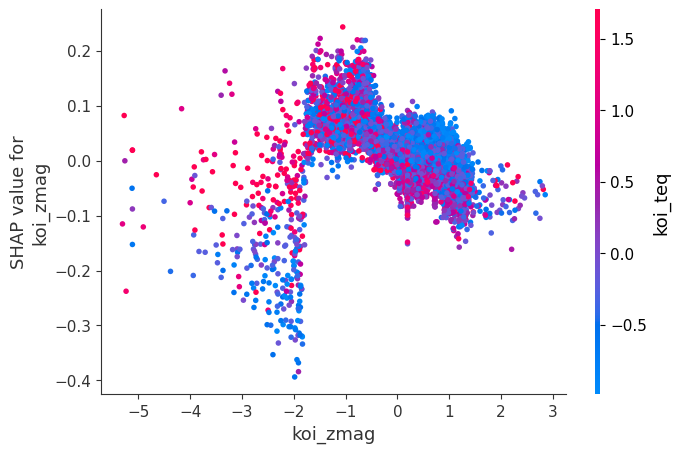

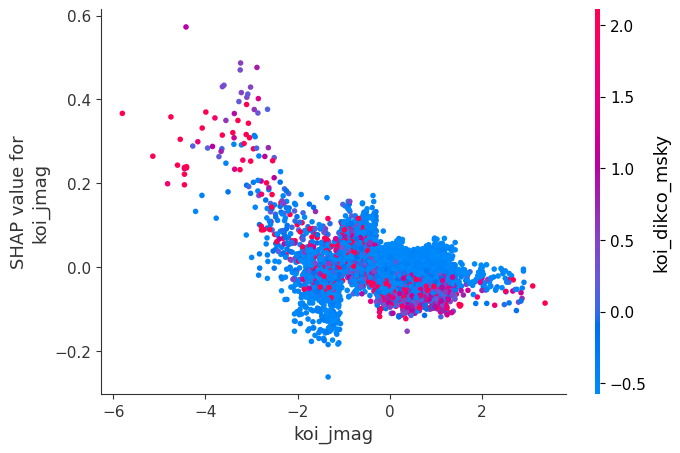

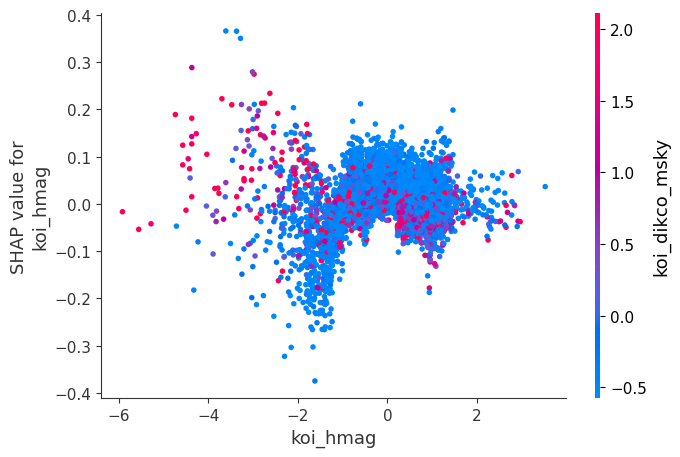

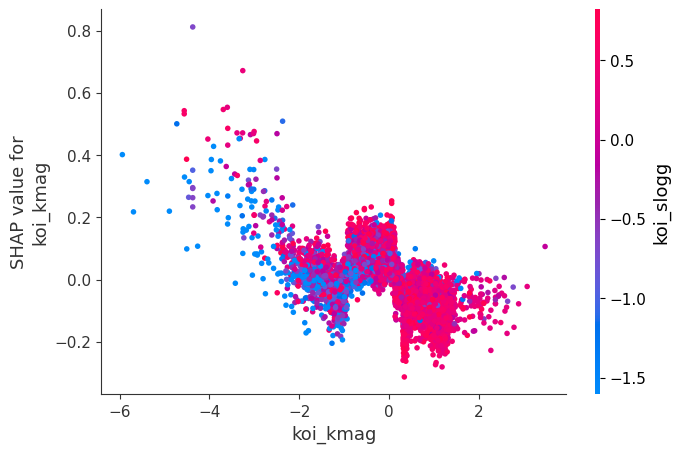

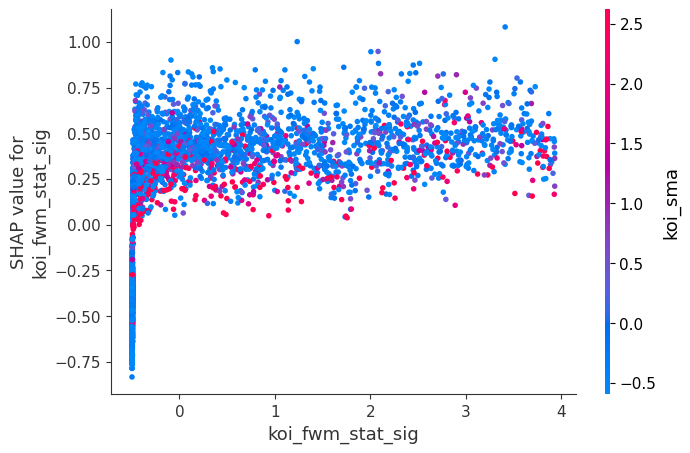

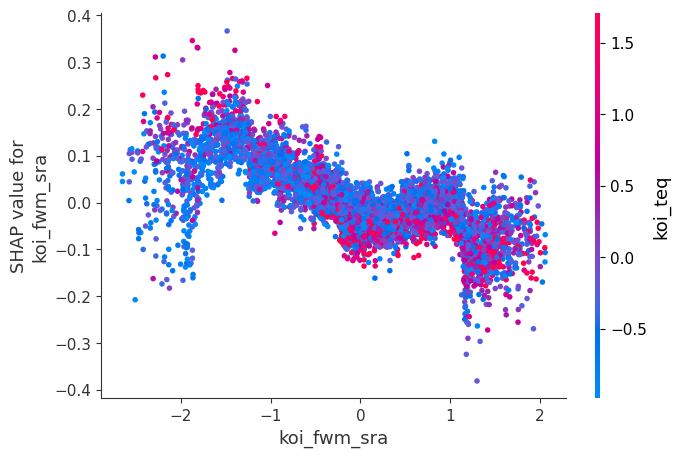

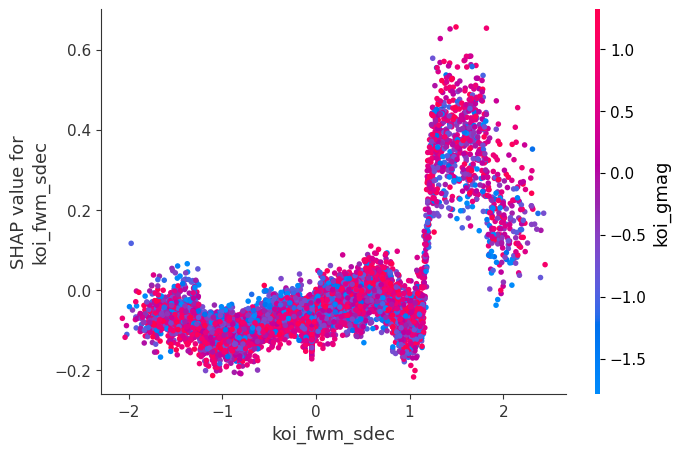

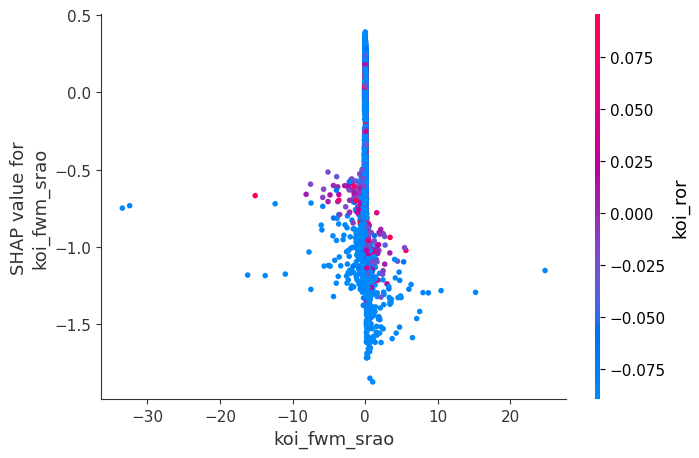

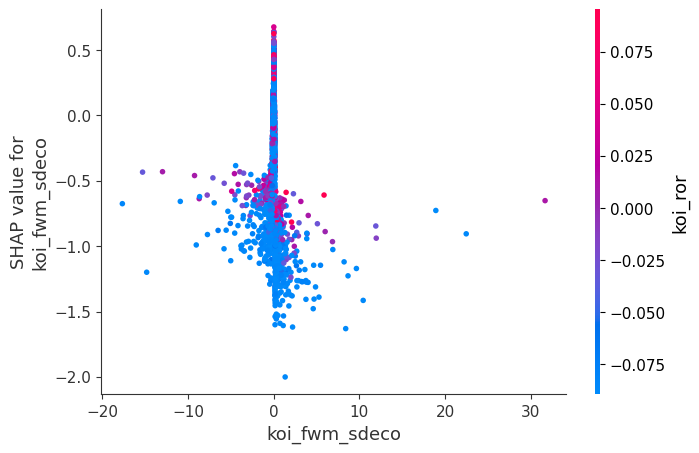

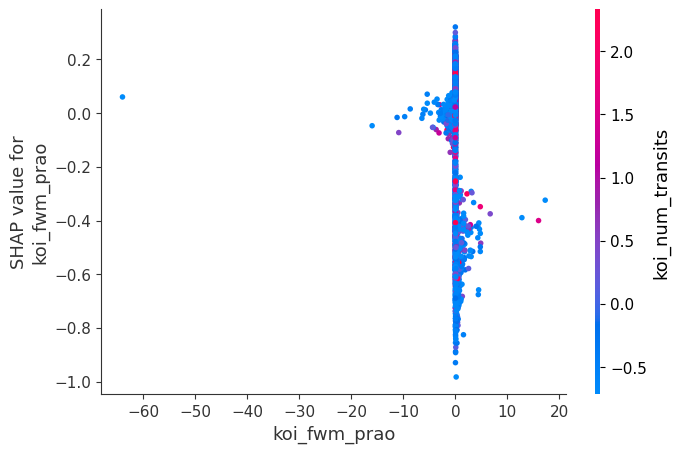

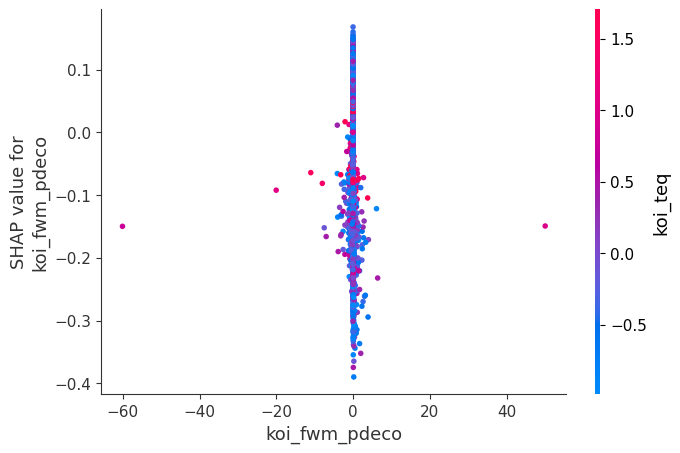

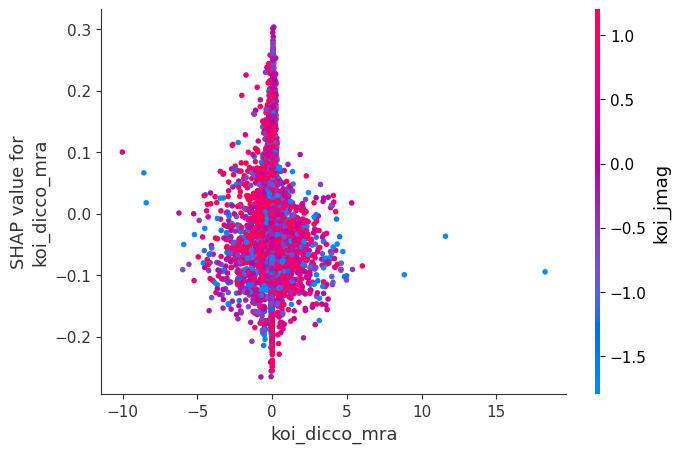

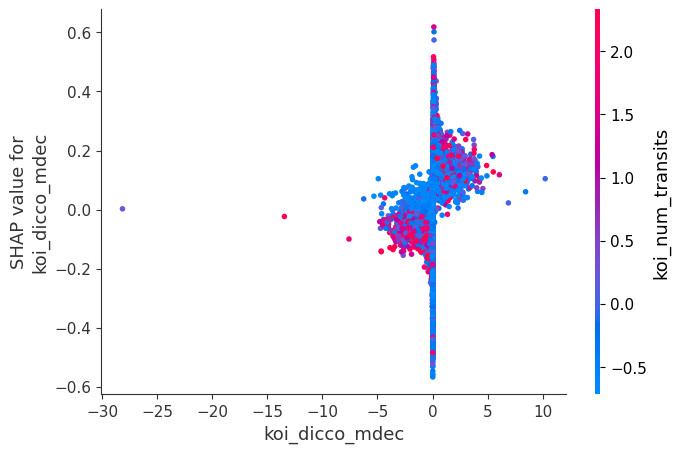

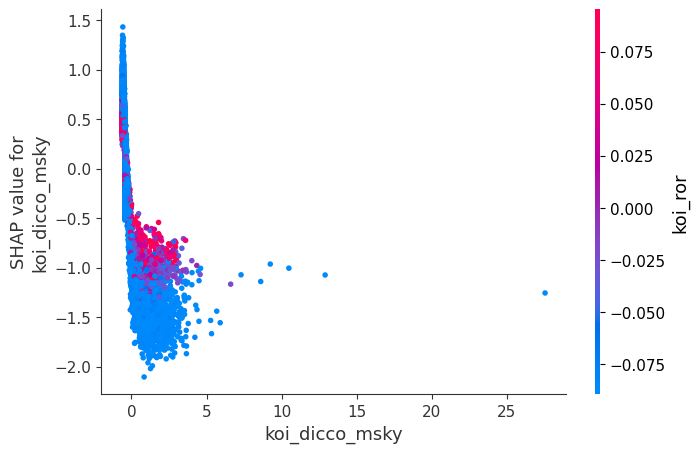

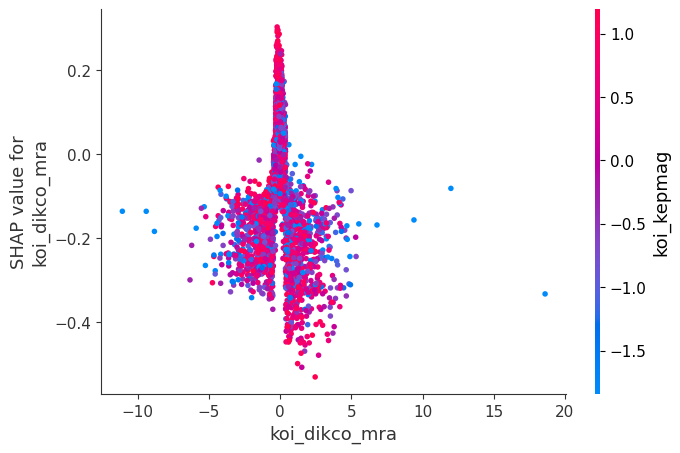

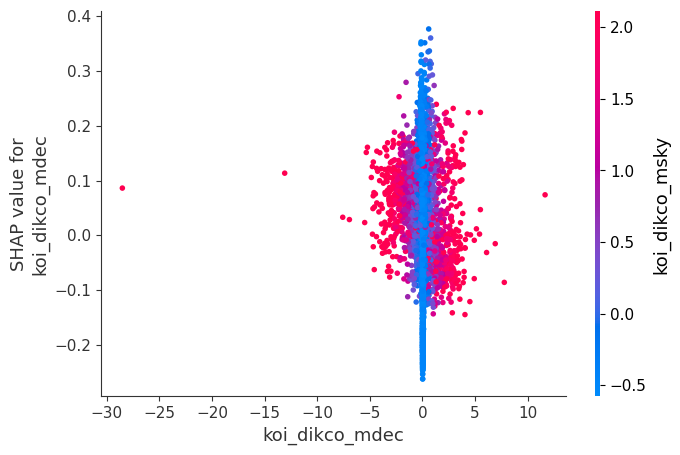

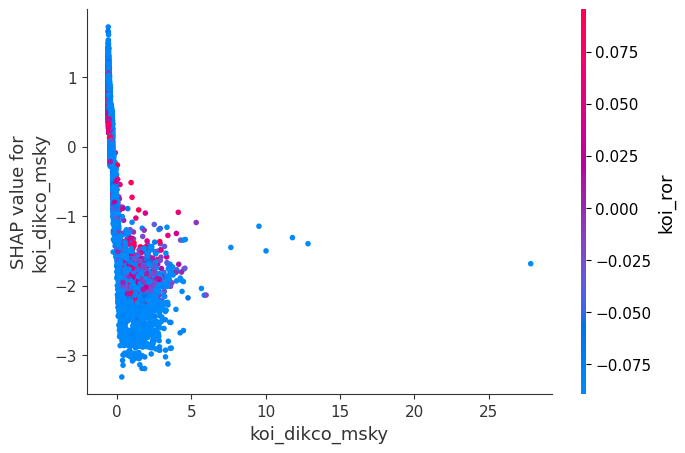

In [41]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)